#**PROVA FINAL**: TURMA NB - PYTHON

*ALUNO: Pâmela Guimarães da Costa | RA: 92981*

Instituto de Ciência e Tecnologia - UNIFESP
UC: processamento de sinais.
2o semestre de 2021
Professor: Thiago Martini Pereira

PREPARAÇÃO DO NOTEBOOK PARA INICIAR PROJETO:

In [81]:
#Baixando as bibliotecas necessárias para a implementação do projeto
import librosa
import librosa.display
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
from os.path import dirname, join as pjoin
import os

In [82]:
from google.colab import drive #service acount do google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
os.chdir('/content/drive/My Drive/Graduação/Processamento/') #acesso a pasta de trabalho

--------

**A)** (1,0) Faça o *plot *do sinal em função do tempo.

In [84]:
fs,sinal_g1 = wavfile.read('g1.wav') #Pegando a frequência de amostragem e o sinal fornecido (renomiei para evitar acentuações)

In [85]:
sinal_g1

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int16)

In [86]:
sinal_g1 = list(map(lambda x: x[0], sinal_g1.tolist()))

44100


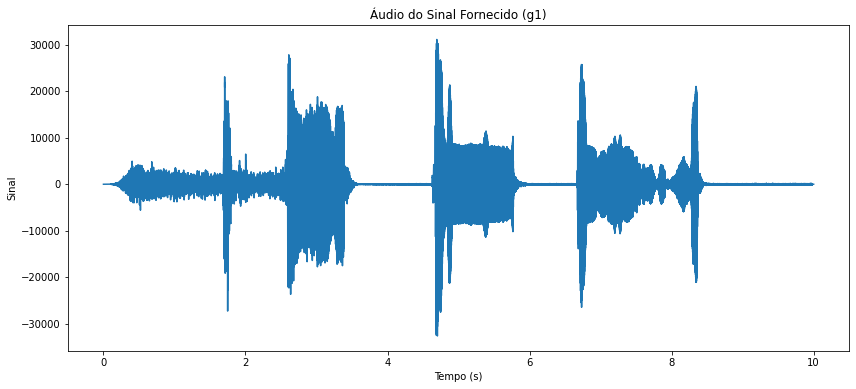

In [87]:
tempo = np.linspace(0, 10, len(sinal_g1)) #Criando o vetor tempo, que vai de 0 a 10

plt.figure(figsize=(14,6)) #Alterando o tamanho do gráfico
plt.title('Áudio do Sinal Fornecido (g1)') #Definindo um título para o gráfico 1
plt.ylabel('Sinal') #Nomeando o eixo y
plt.xlabel('Tempo (s)') #Nomeando o eixo x
plt.plot(tempo,sinal_g1) #Plotando o primeiro gráfico (1)
print(fs)

**B)** (1,0) Faça a transformada de Fourier do sinal usando zero filling de 1 ordem e janela do tipo Hanning. Plote o espectro de energia normalizado. Indique qual é a frequência de nyquist.

taxa de amostragem mínima desejada 22050.0


<Figure size 1008x432 with 0 Axes>

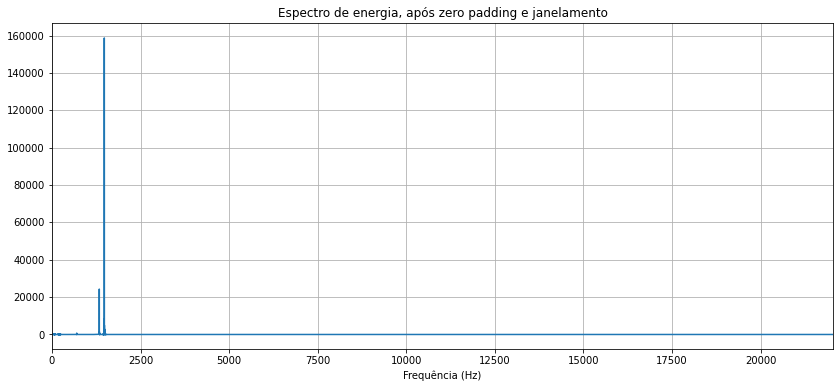

In [88]:
k = 1 #Ordem dos preenchimentos de zeros (1 ordem)
t = tempo
y = sinal_g1
plt.figure(figsize=(14,6))

w_hanning= np.hanning(len(y))
yy = y*w_hanning #Multiplicando o sinal pela janela de Hanning solicitada

#Fazendo fft especificando o n (zero padding)
yfft = np.fft.fft(yy,(k+1)*yy.shape[0])
yfft = np.abs(yfft)/yfft.shape[0]
freq = np.arange(0,fs,fs/yfft.shape[0]) #Novo vetor frequência

plt.figure(figsize = (14,6))
plt.plot(freq,yfft**2)
plt.title('Espectro de energia, após zero padding e janelamento')
plt.xlabel('Frequência (Hz)')
plt.grid('on')
plt.xlim([0,fs/2])

print('taxa de amostragem mínima desejada',fs/2)

# A taxa de amostragem deve ser pelo menos duas vezes maior que a frequência que se deseja
# registrar. Esse é o Teorema de Nyquist ou o Teorema da Amostragem, extremamente importante
# para estabelece o critério adequado para a amostragem do sinal desejado e que seja possível
# recuperar o sinal original. Nyquist provou que, o espectro de um sinal não será afetado pela sua
# discretização se esta ocorrer com uma frequência de amostragem (fs) duas vezes maior que a
# maior frequência do sinal.
# fs >= 2fm
# Sendo, a frequência de amostragem do sinal em estudo 44.1kHz. Podemos concluir que: fm <=
# 22.05kHz

**C)** (1,0) Defina a frequência de amostragem mínima para a preservação do sinal relacionado a codificação DTMF. Justifique a sua resposta.

In [89]:
freq = 1/(tempo[1]-tempo[0]) #Econtrando a frequência
print('A frequencia de amostragem é ' + str(freq))

A frequencia de amostragem é 37820.0


**D)**  (1,0) Projete um filtro FIR usando janela de hamming para evitar o processo de *alising* durante o *downsamplig*.

**E)** (1,0) Realize o processo de *downsampling* no sinal de forma a minimizar o número de amostras do sinal e a preservar o espectro de frequência relacionado ao DFMF. Calcule a nova frequência de amostragem. Justifique a escolha do parâmetro n no *downsample*.

A ordem do filtro necessaria Chebyshev - Tipo 01 é 9


Text(0.5, 1.0, 'Sinal Filtrado')

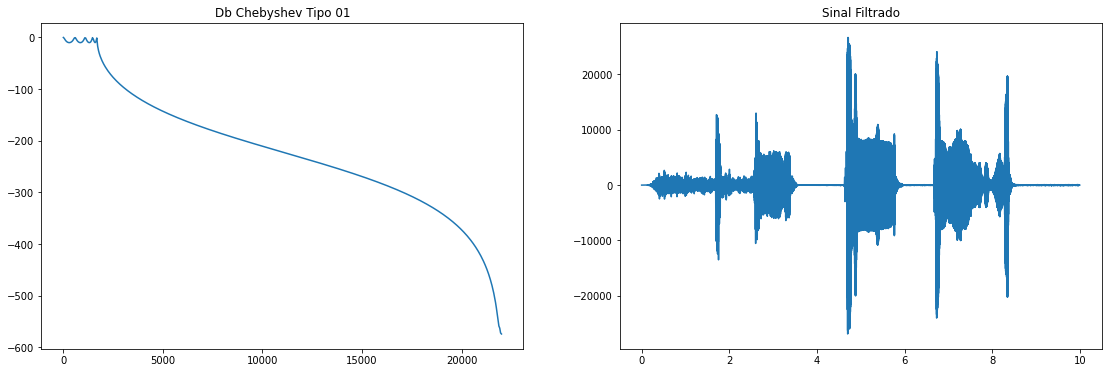

In [90]:
#Determinação da ordem do filtro e sua freq de corte

Wa = 1700 #Frequência mínima da banda de transição 
Wb = 1900 #Frequencia maxima na banda de transição
Ra = 10 #Atenuação maxima na banda de passagem 
Rb = 40 #Atenuação minima na banda de rejeiçao 

ordem,Wn = ss.cheb1ord(Wa,Wb,Ra,Rb,fs) #Determinando a ordem do filtro chebyshev tipo 01
print('A ordem do filtro necessaria Chebyshev - Tipo 01 é ' + str(ordem))
b,a = ss.cheby1(ordem,Ra,Wn,'low',fs=fs) #Projetando o filtro
freq2,abss = ss.freqz(b,a,fs=fs)
Db = 20*np.log10(abs(abss)) #Plotando Db

plt.figure(figsize=(19,6))
plt.subplot(1,2,1)
plt.plot(freq2,Db)
plt.title('Db Chebyshev Tipo 01')

plt.subplot(1,2,2)
SinalFiltrado = ss.lfilter(b,a,sinal_g1) #Filtrando o sinal 
plt.plot(tempo,SinalFiltrado)
plt.title('Sinal Filtrado')

Text(0.5, 1.0, 'Sinal Original e Sinal Filtrado')

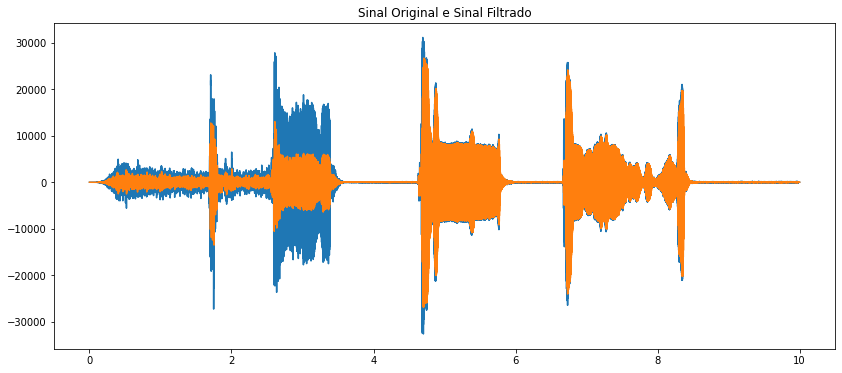

In [91]:
#Plotando o novo gráfico
plt.figure(figsize=(14,6))
plt.plot(tempo,sinal_g1,tempo,SinalFiltrado)
plt.title('Sinal Original e Sinal Filtrado')

Determinando a frequência de amostragem (1), que é essa a frequência máxima aproximada da região DMTF. Na sequência, definido o valor para “n” (2) e calculada a frequência de amostragem através do “n” (3).


(1) freqn = 1700*2

(2) n = fs//freqn

(3) fsn = fs/n


O fator n que será utilizado para o downsampling é 12
A nova frequencia de amostragem após o Downsampling é 3151.6666666666665


(0.0, 1575.8333333333333)

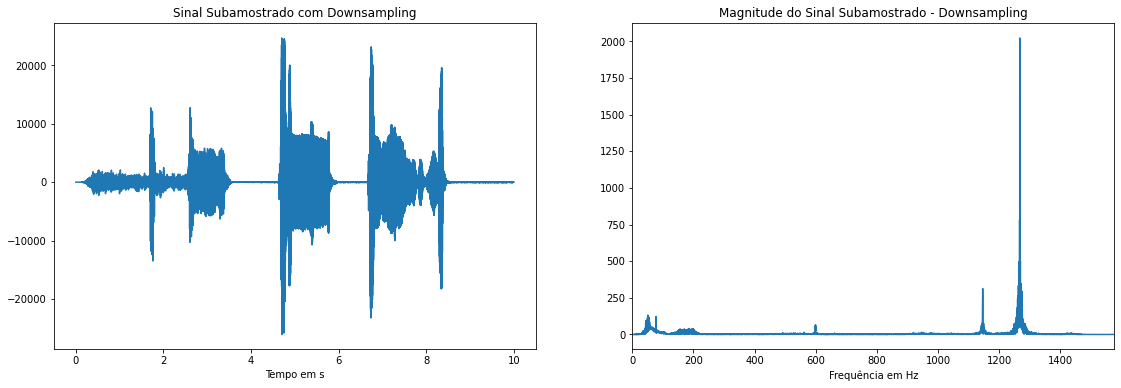

In [92]:
#Realização do Downsampling
freqn = 1700*2 #Determinado a frequência de amostragem
n = fs//freqn #Encontrando o n
fsn = fs/n #Calculando a frequência de amostragem através do n
print('O fator n que será utilizado para o downsampling é ' + str(n))

ta = tempo[::n] #Fatiando o tempo
freqpos = 1/(ta[1]-ta[0]) #Econtrando a frequência, após o fatiamento
print('A nova frequencia de amostragem após o Downsampling é ' + str(freqpos))

SinalDown = SinalFiltrado[::n] #Fatiando o Sinal filtrado no último passo

SinalDownFFT = np.fft.fft(SinalDown) #FFT do sinal resultante
freqDown = np.linspace(0,freqpos,SinalDownFFT.shape[0])

#Plotando o sinal subamostrado e sua FFT:
plt.figure(figsize=(19,6))
plt.subplot(121)
plt.plot(ta,SinalDown)
plt.title('Sinal Subamostrado com Downsampling')
plt.xlabel('Tempo em s')

plt.subplot(122)
plt.plot(freqDown,2*np.abs(SinalDownFFT)/SinalDownFFT.size) #Plotando Magnitude Normalizada x Frequência
plt.title('Magnitude do Sinal Subamostrado - Downsampling')
plt.xlabel('Frequência em Hz')
plt.xlim([0,freqpos/2])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'FFT do sinal filtrado')

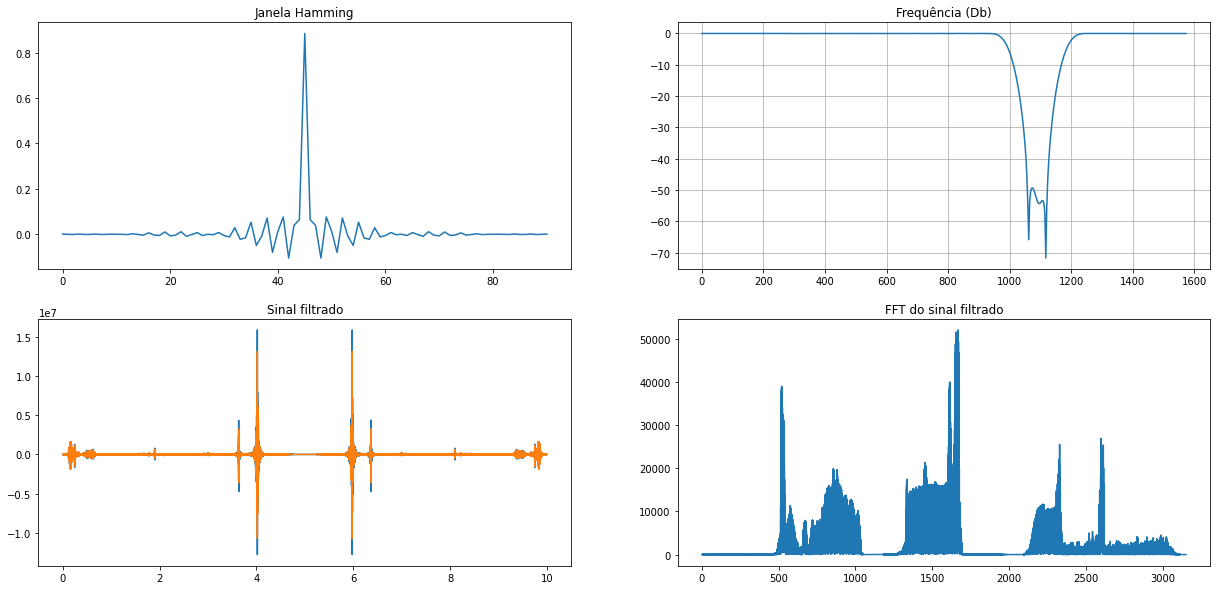

In [93]:
#Filtro rejeita-faixa
kb = ss.firwin(91,[1000,1180], window='hamming',fs=freqpos,pass_zero='bandstop') #Rejeita a faixa de 1000 Hz a 1200 Hz

#Calculando a resposta do filtro em frequencia 
freq,abss = ss.freqz(kb,fs=freqpos)
Db = 20*np.log10(abs(abss))

plt.figure(figsize=(21,10))
plt.subplot(221)
plt.plot(kb)
plt.title("Janela Hamming")

plt.subplot(222)
plt.plot(freq,Db)
plt.grid('on')
plt.title("Frequência (Db)")

#Plotando o sinal antes e depois da filtragem
SinalDownFFT1 = np.convolve(kb,SinalDownFFT,mode='same')
plt.subplot(223)
plt.plot(ta,SinalDownFFT,ta,SinalDownFFT1)
plt.title('Sinal filtrado')

#FFT do sinal filtrado
filtradofft1 = abs(2*np.fft.fft(SinalDownFFT1)/SinalDownFFT1.shape[0])
freq = np.linspace(0,freqpos-1/freqpos,SinalDown.shape[0]) 
plt.subplot(224)
plt.plot(freq,filtradofft1)
plt.title('FFT do sinal filtrado')

**F)** (1,5) Projeto um filtro (FIR-Janela Kaiser, beta=12) do rejeita banda, de forma a ter uma rejeição mínima de -50Db, para remover as frequência entre as bandas DTMF e faça o processo de filtragem no sinal. Faça o gráfico da resposta em frequência deste filtro em Db.

**G)** (1,0) Plot do sinal reamostrado e filtrado em função do tempo.

Text(0.5, 1.0, 'FFT do sinal filtrado')

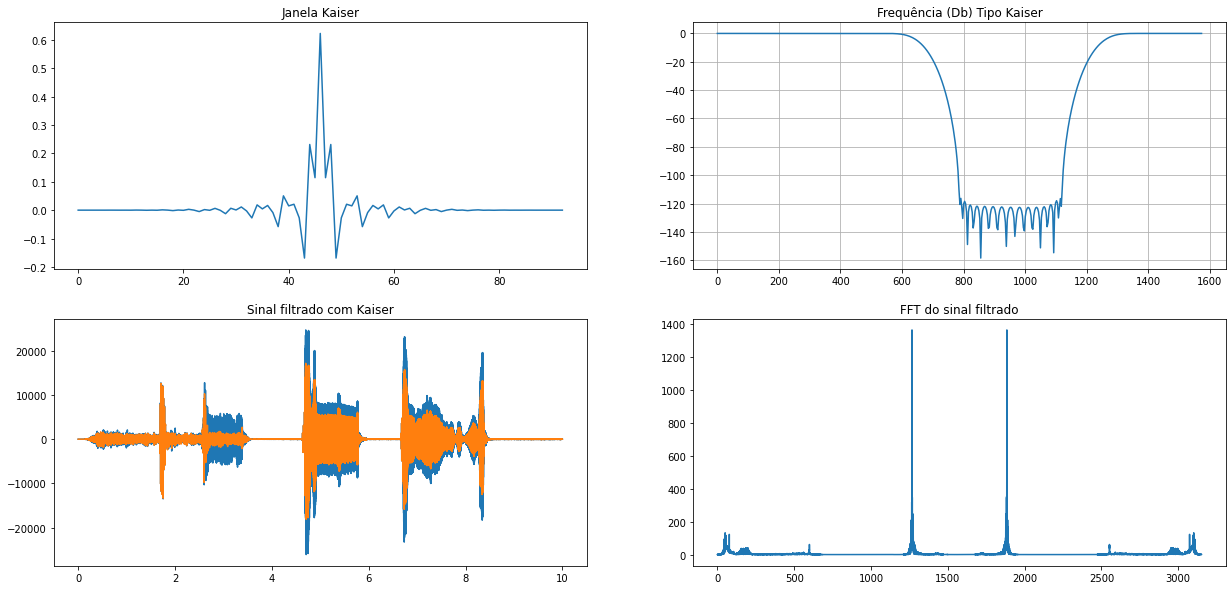

In [142]:
#Filtro passa banda
order = 93 #Ordem estabelecida
fcinf = 655
fcsup = 1250
#Projetando o karnel para filtro passa alta
ka = ss.firwin(order,[fcinf,fcsup], window=('kaiser',12),fs=freqpos,pass_zero='bandstop') #beta=12

#Calculando a resposta do filtro em frequencia 
freq,abss = ss.freqz(ka,fs=freqpos)
Db = 20*np.log10(abs(abss))

plt.figure(figsize=(21,10))
plt.subplot(221)
plt.plot(ka)
plt.title("Janela Kaiser")

plt.subplot(222)
plt.plot(freq,Db)
plt.grid('on')
plt.title("Frequência (Db) Tipo Kaiser")

#Plotando o sinal antes e depois da filtragem

filtered = np.convolve(ka,SinalDown,mode='same')
plt.subplot(223)
plt.plot(ta,SinalDown,ta,filtered)
plt.title('Sinal filtrado com Kaiser')

#FFT do sinal filtrado do tipo Kaiser
SinalDownfft = abs(2*np.fft.fft(filtered)/filtered.shape[0]) 
freq = np.linspace(0,freqpos-1/freqpos,SinalDown.shape[0]) 
plt.subplot(224)
plt.plot(freq,SinalDownfft)
plt.title('FFT do sinal filtrado')

(0.0, 1575.8333333333333)

<Figure size 1008x432 with 0 Axes>

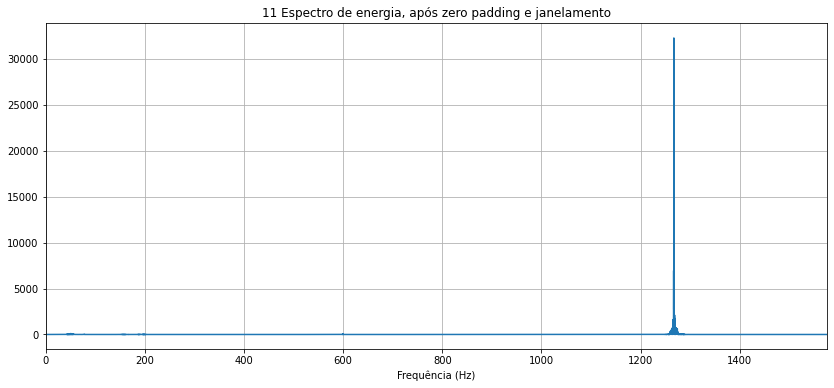

In [143]:
k = 2 #Ordem dos preenchimentos de zeros 
fs = freqpos
t = ta
y = filtered
plt.figure(figsize=(14,6))

w_hanning= np.hanning(y.size)
yy = y*w_hanning #Multiplicando o sinal pela janela 

#Fazendo fft especificando o n (zero padding)
yfft = np.fft.fft(yy,(k+1)*yy.shape[0])
yfft = np.abs(yfft)/yfft.shape[0]
freq = np.arange(0,fs,fs/yfft.shape[0]) #Novo vetor frequência

plt.figure(figsize = (14,6))
plt.plot(freq,yfft**2)
plt.title('11 Espectro de energia, após zero padding e janelamento')
plt.xlabel('Frequência (Hz)')
plt.grid('on')
plt.xlim([0,freqpos/2])

**H)** (1,0) Calcule o espectrograma do sinal filtrado usando resolução em frequência de 5Hz.

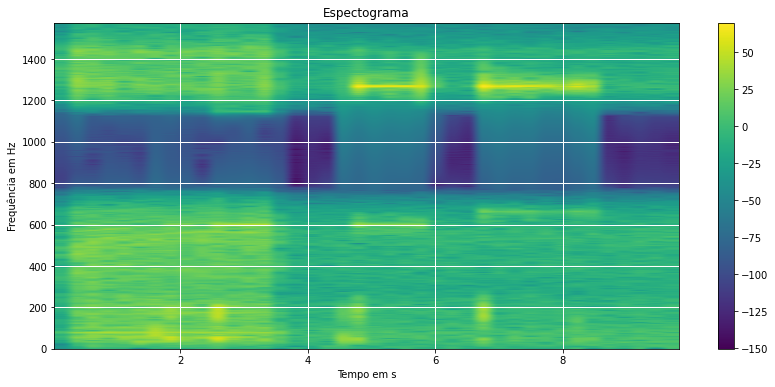

In [144]:
plt.figure(figsize=(14,6)) 
plt.specgram(y, Fs = fs, NFFT = 900) #Plotando o espectograma
plt.colorbar() #Mostrando a barra de cor
plt.title('Espectograma')
plt.ylabel('Frequência em Hz')
plt.xlabel('Tempo em s')
plt.grid(color='w',linewidth=1) #Colocar as linhas de grade

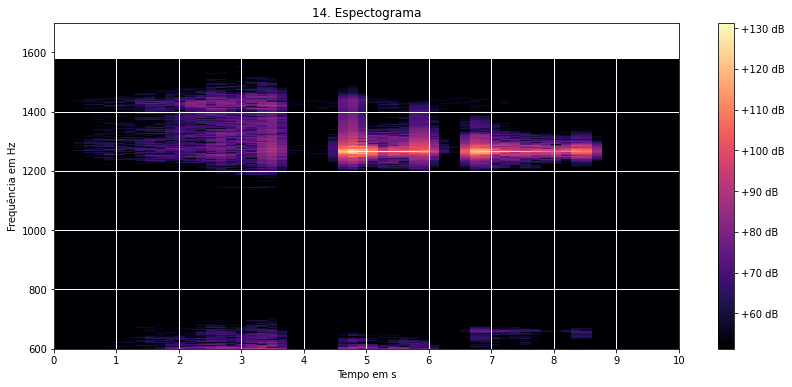

In [145]:
exp = librosa.amplitude_to_db(np.abs(librosa.stft(yy))) #Criação da variável expectral para realização do expectro

plt.figure(figsize=(14,6)) 
librosa.display.specshow(exp,x_axis='time',y_axis='linear',sr=freqpos,fmin=100,fmax=100) #Criação do expectro com seus parâmetros 
plt.colorbar(format='%+2.0f dB') #Inserção de uma coluna de valores em Db
plt.title('14. Espectograma')
plt.ylabel('Frequência em Hz')
plt.xlabel('Tempo em s')
plt.ylim([600,1700])
plt.xlim([0,10])
plt.grid(color='w',linewidth=1) #Colocar as linhas de grade

**I)** (1,0) Determine os números das 3 teclas

Observando o espectrograma temos: 3 >>> 2 >>> 5